In [13]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gp

In [15]:
infile_obs = "vf_obs_spec_2.csv" #File with flow measurements 1900-2025, 119 gauging stations in whole Norway

vf_obs_spec_2 = pd.read_csv(infile_obs, sep=',', parse_dates=True, index_col=0)
vf_obs_spec_2 = vf_obs_spec_2.replace(-9999, np.nan)
vf_obs_spec_2

,88.4.0,101.1.0,109.21.0,109.9.0,112.8.0,11.4.0,121.20.0,122.11.0,124.2.0,127.11.0,...,83.6.0,84.11.0,84.20.0,85.4.0,86.12.0,87.10.0,88.11.0,88.30.0,97.1.0,98.4.0
Dato,,,,,,,,,,,,,,,,,,,,,
1900-03-20 12:00:00,6.983511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-21 12:00:00,6.897139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-22 12:00:00,6.769414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-23 12:00:00,6.684264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-24 12:00:00,6.556539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-19 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-20 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-21 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Creating new datasets with Vestlandet and Østlandet taken out from the flow observation file by selecting stations

In [16]:
#List with stations for Vestlandet and Østlandet 
vestlandet_list = [
    "83.2.0","84.11.0","84.20.0","85.4.0","88.4.0","86.12.0","88.30.0",
    "97.1.0","98.4.0","101.1.0","109.21.0","82.4.0","87.10.0","81.1.0","62.18.0",
    "27.15.0","35.16.0","35.9.0","38.1.0","42.2.0","48.5.0","55.4.0","50.1.0",
    "62.14.0","62.15.0","80.4.0","62.5.0","73.21.0","76.5.0","78.8.0","62.10.0"
]

ostlandet_list = [
    "12.207.0","19.96.0","73.27.0","19.82.0","19.79.0","19.104.0","16.66.0",
    "16.194.0","16.127.0","16.122.0","15.21.0","12.70.0","12.197.0","2.142.0","12.188.0",
    "12.171.0","12.13.0","11.4.0","3.22.0","2.439.0","2.303.0","2.291.0","2.279.0",
    "2.265.0","2.11.0","311.6.0","12.193.0","313.10.0"
]


selected_stations = vestlandet_list + ostlandet_list


vf_selected = vf_obs_spec_2[selected_stations]


vf_selected.head()

,83.2.0,84.11.0,84.20.0,85.4.0,88.4.0,86.12.0,88.30.0,97.1.0,98.4.0,101.1.0,...,3.22.0,2.439.0,2.303.0,2.291.0,2.279.0,2.265.0,2.11.0,311.6.0,12.193.0,313.10.0
Dato,,,,,,,,,,,,,,,,,,,,,
1900-03-20 12:00:00,NaN,NaN,NaN,NaN,6.983511,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-21 12:00:00,NaN,NaN,NaN,NaN,6.897139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-22 12:00:00,NaN,NaN,NaN,NaN,6.769414,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-23 12:00:00,NaN,NaN,NaN,NaN,6.684264,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-24 12:00:00,NaN,NaN,NaN,NaN,6.556539,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Selecting preferable data period from 1984 to 2024 using summer season from 15 of may to 15 of september (NVE)

In [17]:
startdate = pd.to_datetime("1984-05-15")#.date() #Selecting dates and year
enddate = pd.to_datetime("2024-09-15")#.date()
q_prd= vf_selected.loc[startdate:enddate]

q_prd

,83.2.0,84.11.0,84.20.0,85.4.0,88.4.0,86.12.0,88.30.0,97.1.0,98.4.0,101.1.0,...,3.22.0,2.439.0,2.303.0,2.291.0,2.279.0,2.265.0,2.11.0,311.6.0,12.193.0,313.10.0
Dato,,,,,,,,,,,,,,,,,,,,,
1984-05-15 12:00:00,54.813663,90.075813,64.960168,80.062290,23.937389,50.308115,26.693202,89.366252,62.375119,84.863218,...,9.355437,53.031326,31.287150,11.545667,16.682602,40.826381,33.090266,24.274383,6.985603,10.172342
1984-05-16 12:00:00,60.423789,211.897518,97.011187,130.334992,26.793911,77.107481,28.495865,118.735953,97.053049,84.863218,...,10.164294,107.606045,63.444968,19.555626,27.985725,40.826381,55.633129,25.896341,12.446236,11.771352
1984-05-17 12:00:00,80.465457,211.897518,156.033541,206.836642,31.858736,142.245140,36.537557,170.632897,148.581771,81.152318,...,13.613778,122.736272,84.388543,30.443900,36.576828,40.125232,115.735685,30.386596,22.046100,18.618181
1984-05-18 12:00:00,143.887516,251.081478,225.952144,285.581108,47.994039,167.521303,38.765295,196.721745,181.597984,82.995741,...,13.164556,96.312665,107.343133,37.876433,44.822151,40.125232,130.139779,30.914606,39.695090,18.618181
1984-05-19 12:00:00,167.763213,261.572172,260.766706,319.869045,55.760885,201.117753,71.397184,183.444676,193.536037,77.537610,...,13.613778,83.935667,117.120434,52.016777,48.870032,40.826381,128.027010,31.717755,49.352424,16.454391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-10 12:00:00,NaN,NaN,89.574030,329.955278,320.230967,194.896451,382.932547,169.977097,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,59.939795,NaN,NaN,NaN
2024-09-11 12:00:00,NaN,NaN,85.543449,177.381391,280.267369,259.388041,303.496725,89.591608,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,91.789644,NaN,NaN,NaN
2024-09-12 12:00:00,NaN,NaN,232.997485,592.807712,230.152060,430.055666,234.599437,108.010530,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82.576514,NaN,NaN,NaN


Calculating AM7 by first selecting summer season may to september (5-9). 7 day rolling mean is used and time series are resampled to year ('YE'). For each year the minimum of the 7 days mean flow is calculated. This gives annual minimum 7 day low flow (AM7) for each gauging station

In [18]:
#Calculating AM7 
summer = [5,6,7,8,9]

AM7 = q_prd.loc[q_prd.index.month.isin(summer)].rolling(7).mean().resample("YE").min()#.mean() #gjennomsnittlige minste årlige ukesverdi AM7 tabellen 
AM7

,83.2.0,84.11.0,84.20.0,85.4.0,88.4.0,86.12.0,88.30.0,97.1.0,98.4.0,101.1.0,...,3.22.0,2.439.0,2.303.0,2.291.0,2.279.0,2.265.0,2.11.0,311.6.0,12.193.0,313.10.0
Dato,,,,,,,,,,,,,,,,,,,,,
1984-12-31,25.308629,5.877110,8.272300,15.916070,27.664465,30.065095,37.074337,22.255743,13.437157,8.371439,...,1.717835,4.919005,7.992984,18.600589,2.911982,9.678396,8.961335,8.782803,1.212016,1.655157
1985-12-31,20.778790,8.039496,9.652030,19.535051,10.758426,22.773554,11.905688,23.100182,13.675093,10.856384,...,3.405659,3.668937,1.949392,3.177044,8.636870,5.952224,2.607229,6.600147,1.672346,8.142687
1986-12-31,29.593638,8.519745,9.378757,21.436828,35.240496,49.270487,29.498736,37.383313,21.423317,2.598808,...,0.779635,NaN,10.765409,12.066669,1.556757,9.536346,7.907491,10.749308,0.117551,1.387276
1987-12-31,48.662572,22.865005,19.338270,32.575266,26.526188,37.814799,34.193713,53.598341,42.475780,7.725676,...,1.933902,11.540885,16.298923,7.977904,3.740750,14.164559,6.020808,17.066920,0.864061,3.637780
1988-12-31,45.804115,16.587253,35.619998,49.307599,17.331885,45.136161,26.281389,44.313134,34.441939,3.144088,...,1.564907,9.592920,4.182653,3.782145,2.906779,NaN,4.770102,16.216317,1.454504,1.588473
1989-12-31,74.621587,43.219431,48.196474,45.743452,28.249969,71.575505,37.310055,56.414032,48.377100,16.458070,...,0.494138,5.874582,10.391385,7.478394,1.788413,NaN,7.434769,10.616908,0.088267,0.873757
1990-12-31,71.898033,38.226647,38.401283,56.509533,39.446080,68.281192,38.328730,44.481640,32.673709,6.599474,...,0.602795,3.509594,9.937098,17.020191,1.847157,NaN,15.844170,13.137508,0.431850,1.224542
1991-12-31,25.294932,25.991666,23.185579,44.420941,13.514659,29.162873,17.338453,49.304413,25.214169,5.843294,...,0.633532,4.427497,4.616842,4.607570,4.585757,7.456019,7.517661,8.161013,0.196117,1.077616
1992-12-31,61.909528,14.874046,30.488477,50.416446,23.320765,78.197797,20.476857,39.544489,33.292858,10.789612,...,0.628189,2.085134,10.683895,3.826050,1.413348,NaN,5.150431,9.927839,0.002658,0.511910


Plotting of the distributions of AM7 for each stations for all years

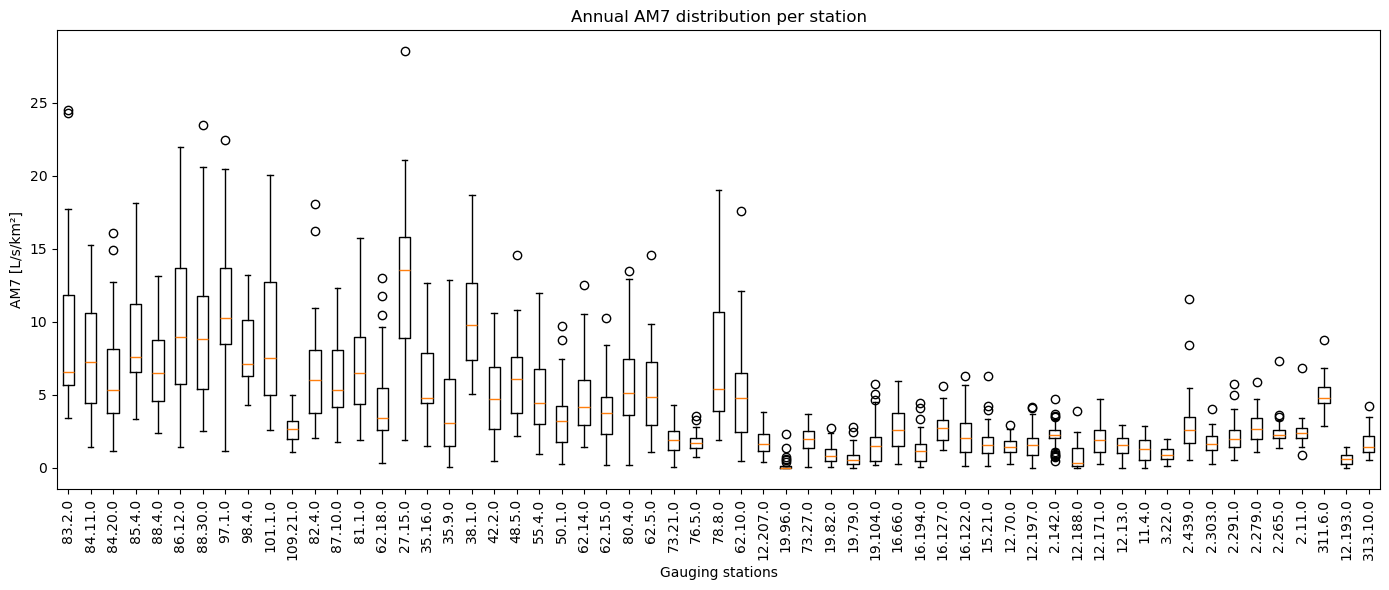

In [11]:


am7_yearly = (
    q_prd.rolling(7, min_periods=7).mean()              
        .resample("YE").min()                           
)


# Boxplot with stations on x axis and AM7 on y
data = [am7_yearly[col].dropna().values for col in am7_yearly.columns]
plt.figure(figsize=(14,6))
bp = plt.boxplot(data, showfliers=True)
plt.xticks(range(1, len(am7_yearly.columns)+1), am7_yearly.columns, rotation=90)
plt.ylabel("AM7 [L/s/km²]")
plt.xlabel ( "Gauging stations")
plt.title("Annual AM7 distribution per station")
plt.tight_layout()
plt.show()

Trend test with Mann-Kendall trend test for each station. 

In [19]:
pip install pymannkendall

  Using cached pymannkendall-1.4.3-py3-none-any.whl.metadata (14 kB)
Using cached pymannkendall-1.4.3-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pymannkendall as mk 



results_list = [] #creating empty list to store all results for mann kendall 

for station in AM7.columns:
    
    series = AM7[station].dropna() #taking out the AM7 time series for the stations and dropping missing values
    
   
    mk_result = mk.original_test(series) #running the Mann Kendall test
    
    
    results_list.append({
        "Station": station, #stations ID. 
        "Trend": mk_result.trend, #either decreasing, increasing or no trends 
        "p-value": mk_result.p, #the significance level of the test
        "Kendall’s Tau": mk_result.Tau #Tau shows strenght and direction of the trend 
    })


df_results = pd.DataFrame(results_list)


print(df_results)

pd.set_option('display.max_rows', None)
print(df_results)

 

     Station       Trend   p-value  Kendall’s Tau
0     83.2.0    no trend  0.861264      -0.020513
1    84.11.0    no trend  0.600072       0.058974
2    84.20.0    no trend  0.901671       0.014634
3     85.4.0    no trend  0.973120       0.004878
4     88.4.0    no trend  0.613252      -0.056098
5    86.12.0    no trend  0.296222       0.114634
6    88.30.0  decreasing  0.044377      -0.219512
7     97.1.0    no trend  0.507533      -0.073171
8     98.4.0    no trend  0.700620      -0.043590
9    101.1.0    no trend  0.289034       0.117949
10  109.21.0    no trend  0.880084      -0.018492
11    82.4.0    no trend  0.448860      -0.084615
12   87.10.0    no trend  0.522029       0.070732
13    81.1.0    no trend  0.770840      -0.033333
14   62.18.0    no trend  0.233976      -0.138138
15   27.15.0  increasing  0.029448       0.244265
16   35.16.0    no trend  0.123136       0.187166
17    35.9.0    no trend  0.973120      -0.004878
18    38.1.0    no trend  0.290950       0.120910


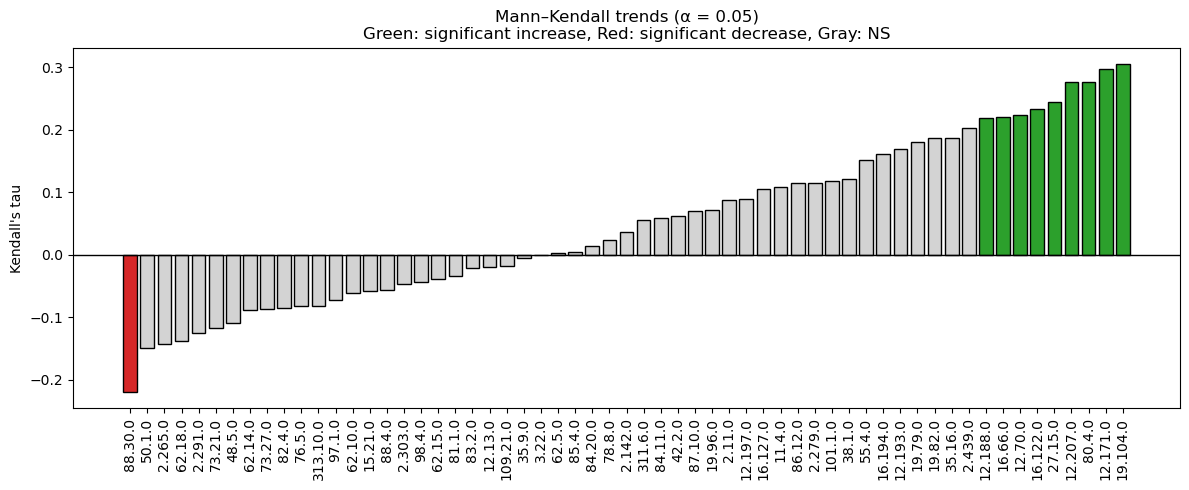

In [21]:

import matplotlib.pyplot as plt #plotting to show trends for all stations in Vestlandet and Østlandet 

alpha = 0.05
df_plot = df_results.copy()
df_plot["sig"] = df_plot["p-value"] < alpha
df_plot = df_plot.sort_values("Kendall’s Tau") 


colors = np.where(df_plot["sig"] & (df_plot["Kendall’s Tau"] > 0), "tab:green",
         np.where(df_plot["sig"] & (df_plot["Kendall’s Tau"] < 0), "tab:red", "lightgray"))

plt.figure(figsize=(12,5))
plt.bar(df_plot["Station"], df_plot["Kendall’s Tau"], color=colors, edgecolor="k")
plt.axhline(0, color="k", lw=1)
plt.xticks(rotation=90)
plt.ylabel("Kendall's tau")
plt.title("Mann–Kendall trends (α = 0.05)\nGreen: significant increase, Red: significant decrease, Gray: NS")
plt.tight_layout()
plt.show()

Plotting Mann Kenndall results for each stations separately for Vestlandet and Østlandet

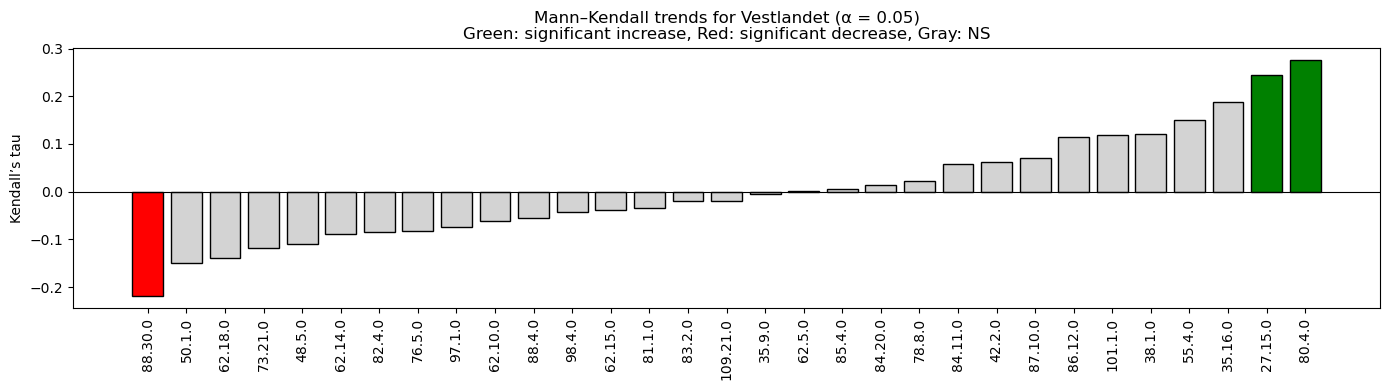

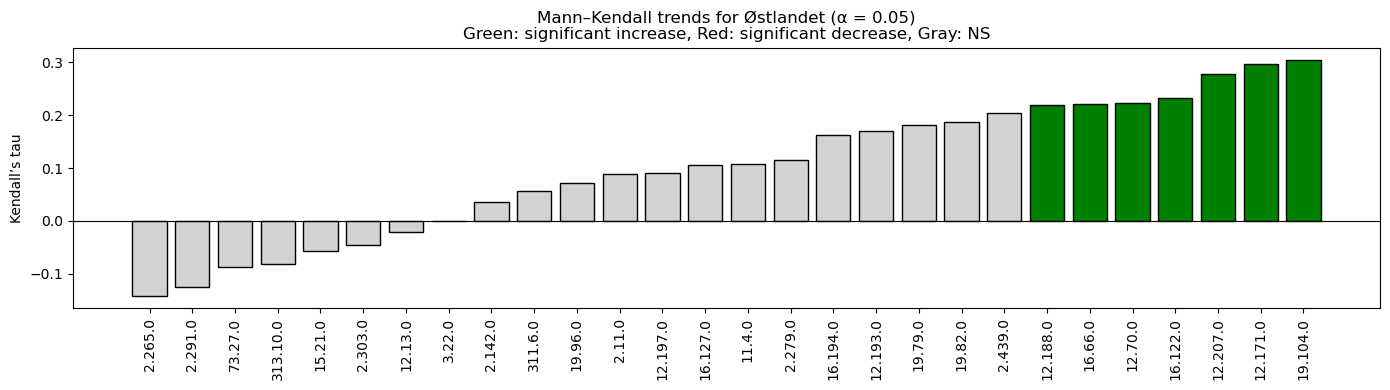

In [26]:
import matplotlib.pyplot as plt

def plot_mk_region(df_results, region_name, alpha=0.05):
    
    df_plot = df_results.sort_values("Kendall’s Tau") #Sorting values after kendalls tau

    #giving colors for increasing trend (green), decreasing trend (red) and no trends (grey) 
    colors = []
    for _, row in df_plot.iterrows():
        if row["p-value"] < alpha and row["Kendall’s Tau"] > 0:
            colors.append("green")
        elif row["p-value"] < alpha and row["Kendall’s Tau"] < 0:
            colors.append("red")
        else:
            colors.append("lightgray")

    plt.figure(figsize=(14, 4))
    plt.bar(df_plot["Station"].astype(str), df_plot["Kendall’s Tau"],
            color=colors, edgecolor="black")
    plt.axhline(0, color="black", linewidth=0.8)

    plt.ylabel("Kendall’s tau")
    plt.title(f"Mann–Kendall trends for {region_name} (α = {alpha})\n"
              "Green: significant increase, Red: significant decrease, Gray: NS")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()



    #plotting separate plots for each region

plot_mk_region(df_results_vestlandet, "Vestlandet")
plot_mk_region(df_results_ostlandet, "Østlandet")

  
